In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
import numpy as np
import handcalcs.render

In [2]:
# Color 0: blue, 1:Green, 2: Red
# Gender 0 Male, 1 Female


data = pd.DataFrame({'Height': [1.6,1.6,1.5,1.8,1.5,1.4],
                    'Favorite Color':[0, 1, 0,2,1,0],
                    'Gender':[0,1,1,0,0,1],
                     'Weight':[88,76,56,73,77,57]
                    })

data['Residual1'] = data['Weight'] - data['Weight'].mean()
data

,Height,Favorite Color,Gender,Weight,Residual1
0,1.6,0,0,88,16.833333
1,1.6,1,1,76,4.833333
2,1.5,0,1,56,-15.166667
3,1.8,2,0,73,1.833333
4,1.5,1,0,77,5.833333
5,1.4,0,1,57,-14.166667


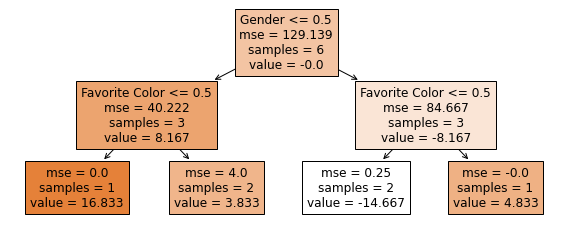

In [3]:
X,y = data[['Height', 'Favorite Color', 'Gender']], data['Residual1'] 
tree1 = DecisionTreeRegressor(max_depth=2)
tree1 = tree1.fit(X, y)

fig = plt.figure(figsize=(10,4))
_ = tree.plot_tree(tree1, feature_names = X.columns, filled = True)

In [4]:
learning_rate = 0.1
data['Residual2'] = data['Weight'].values - learning_rate*tree1.predict(X)- data['Weight'].mean()
data

,Height,Favorite Color,Gender,Weight,Residual1,Residual2
0,1.6,0,0,88,16.833333,15.15
1,1.6,1,1,76,4.833333,4.35
2,1.5,0,1,56,-15.166667,-13.70
3,1.8,2,0,73,1.833333,1.45
4,1.5,1,0,77,5.833333,5.45
5,1.4,0,1,57,-14.166667,-12.70


### Since the residual2 is smaller than residual1. 
#### We are making progress in the right direction.

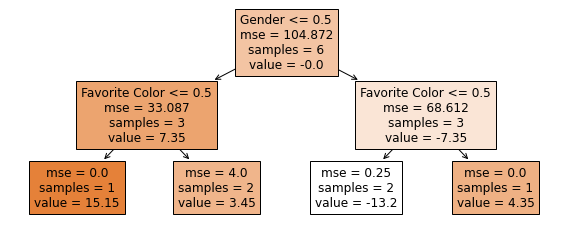

In [5]:
X,y = data[['Height', 'Favorite Color', 'Gender']], data['Residual2'] 
tree2 = DecisionTreeRegressor(max_depth=2)
tree2 = tree1.fit(X, y)

fig = plt.figure(figsize=(10,4))
_ = tree.plot_tree(tree1, feature_names = X.columns, filled = True)

In [6]:
data['Residual3'] = data['Weight'].values - learning_rate*tree1.predict(X) \
                     - learning_rate*tree2.predict(X)- data['Weight'].mean()
data

,Height,Favorite Color,Gender,Weight,Residual1,Residual2,Residual3
0,1.6,0,0,88,16.833333,15.15,13.803333
1,1.6,1,1,76,4.833333,4.35,3.963333
2,1.5,0,1,56,-15.166667,-13.70,-12.526667
3,1.8,2,0,73,1.833333,1.45,1.143333
4,1.5,1,0,77,5.833333,5.45,5.143333
5,1.4,0,1,57,-14.166667,-12.70,-11.526667


In [7]:
# using the new prediction, the residual is smaller than before,
# we take another step toward right direction, 
# We build another tree based on the residual, and predict those residual on the next tree
# we repeat the process until we reach the maximum numbers of trees or residual is small enough